## import stuff 

In [4]:
# Import some necessary modules
import os
import sys
import pickle
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chainconsumer import ChainConsumer     

sys.path.append("../../Barry/")     # Change this so that it points to where you have Barry installed

#from barry.samplers import DynestySampler
from barry.samplers import NautilusSampler
from barry.config import setup
from barry.models import PowerBeutler2017, CorrBeutler2017
from barry.datasets.dataset_power_spectrum import PowerSpectrum_DESI_KP4
from barry.datasets.dataset_correlation_function import CorrelationFunction_DESI_KP4
from barry.fitter import Fitter
from barry.models.model import Correction # class for applying corrections to the likelihood function 
from barry.utils import weighted_avg_and_cov # function for getting avg and covariance 


CV = True 

pfn1 = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG/output/desi_kp4_abacus_cubic_ELG.fitter.pkl"

pfn2 = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG_phaseshiftfree-limitkmin/output/desi_kp4_abacus_cubic_ELG_phaseshiftfree-limitkmin.fitter.pkl"
    
pfns = [
#        pfn1, 
        pfn2
]



## looping through and saving the chains 

In [5]:
c = ChainConsumer() 

for i,p in enumerate(pfns): 
    with open(p, 'rb') as pickle_file:
        fitter = pickle.load(pickle_file)

    for posterior, weight, chain, evidence, model, data, extra in fitter.load():
        
        
        if 'mean' not in extra['name']:  # making sure we only get chain for mock mean 
            continue 
            
        if 'Prerecon' in extra['name']:
            continue 
            
        if 'Pk' not in extra['name']:
            continue 
#         CVfile = '' # making sure we adjust this parameter if CV or not and skipping depending on value of CV 
#         if CV:
#             CVfile = 'CV'
#             if "CV" not in extra["name"] or "Pk" not in extra["name"]:
#                continue
#         else:
#             if "CV" in extra['name']:
#                 continue 
#             if "Pk" not in extra['name']:
#                 continue 
                
                
        df = pd.DataFrame(chain, columns=model.get_labels())
    
        # Compute alpha_par and alpha_perp for each point in the chain
        alpha_par, alpha_perp = model.get_alphas(df["$\\alpha$"].to_numpy(), df["$\\epsilon$"].to_numpy())
        df["$\\alpha_\\parallel$"] = alpha_par
        df["$\\alpha_\\perp$"] = alpha_perp
        
        extraname = ''
        if i == 1:
            extraname = ' beta model'
        # Add the chain or MAP to the Chainconsumer plots
        #print(extra)
        extra.pop("realisation", 'mean')#+ extraname)
        extra["name"] = extra['name'] + extraname
        
        #print(extra)

        c.add_chain(df, weights=weight, **extra, plot_contour=True, plot_point=False, show_as_1d_prior=False)
        #print('test')
        

INFO:barry:Loading chains
INFO:barry:Loaded 104 chains


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__version__', '__weakref__', '_all_colours', '_all_names', '_all_parameters', '_cmaps', '_configured', '_configured_truth', '_default_parameters', '_gauss_mode', '_get_chain', '_get_chain_name', '_init_params', '_linestyles', '_logger', '_num_configure_calls', 'add_chain', 'add_covariance', 'add_marker', 'analysis', 'chains', 'color_finder', 'comparison', 'comparison_aic', 'comparison_bic', 'comparison_dic', 'comparison_table', 'config', 'config_truth', 'configure', 'configure_truth', 'diagnostic', 'diagnostic_gelman_rubin', 'diagnostic_geweke', 'divide_chain', 'get_correlation_table', 'get_correlations', 'get_covariance', 'get_covariance_table'

INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral


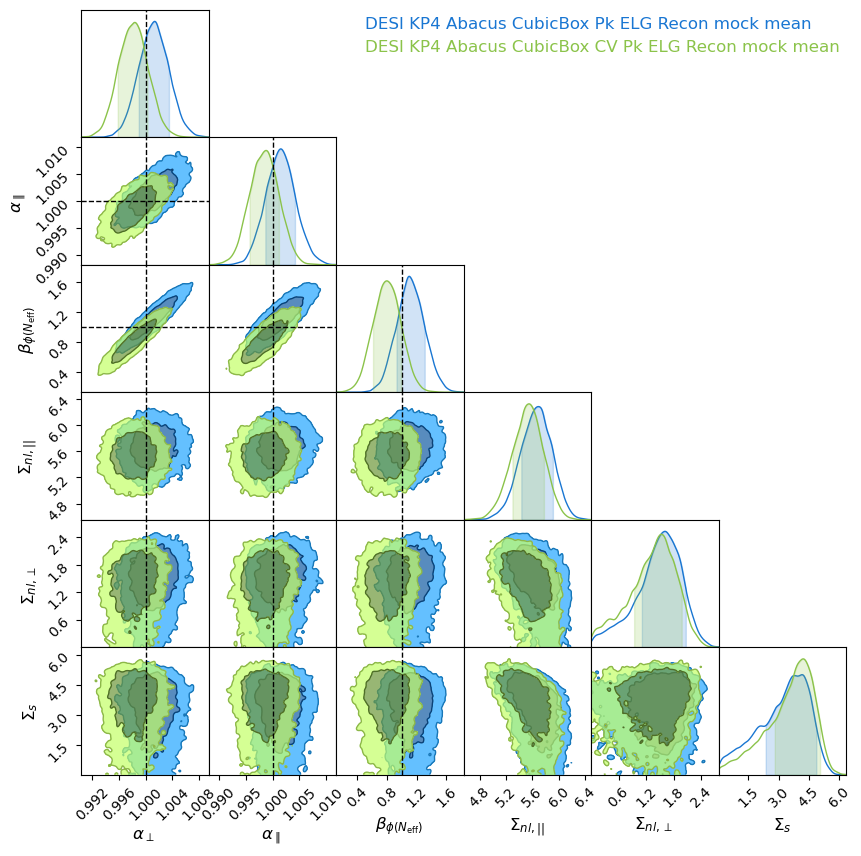

INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral


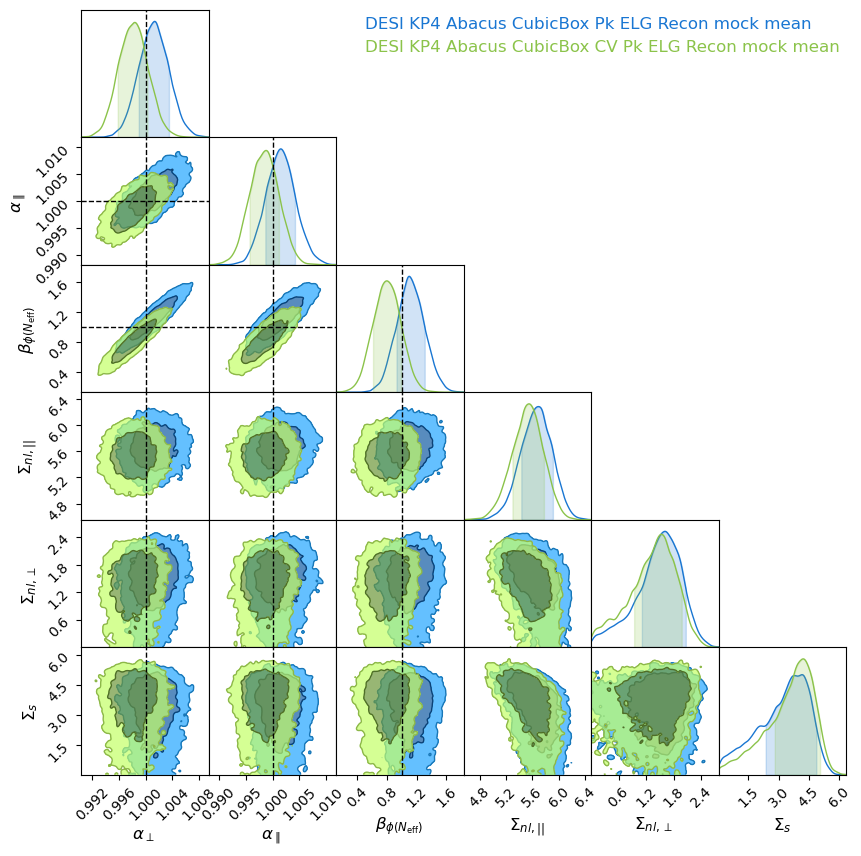

In [6]:
truth = {"$\\alpha$": 1.0, "$\\epsilon$": 0, "$\\alpha_\\perp$": 1.0, "$\\alpha_\\parallel$": 1.0}

truth["$\\beta_{\\phi(N_{\\mathrm{eff}})}$"] = 1.0

parameters = [names for names in truth]
parameters.append("$\\Sigma_{nl,||}$")
parameters.append("$\\Sigma_{nl,\\perp}$")
parameters.append("$\\Sigma_s$")

print(dir(c))

c.plotter.plot(
    truth=truth,
        parameters = parameters[2:],
        legend=True,
        display=False,
        figsize=(9,9), 
    )